# Lab 3d: The XOR Problem
In this lab, we'll look at the performance of [the Perceptron](https://en.wikipedia.org/wiki/Perceptron) and [Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression) on a dataset that is _not linearly seperable_, namely [the XOR dataset](https://en.wikipedia.org/wiki/Exclusive_or).

* __Backstory__: In 1969, AI researchers [Marvin Minsky](https://en.wikipedia.org/wiki/Marvin_Minsky) and [Seymour Papert](https://en.wikipedia.org/wiki/Seymour_Papert) published a book called [Perceptrons](https://en.wikipedia.org/wiki/Perceptrons_(book)), in which they argued that [the perceptron built by Rosenblatt](https://en.wikipedia.org/wiki/Perceptron) was incapable of learning certain functions, one of those being [the XOR function](https://en.wikipedia.org/wiki/Exclusive_or). Soon after [Perceptrons](https://en.wikipedia.org/wiki/Perceptrons_(book)) was published, the first [AI winter](https://en.wikipedia.org/wiki/AI_winter) began. Are these events correlated, maybe!

First, let's build and analyze datasets that _should work_, i.e., they are (nearly) linearly separable, and then we'll explore datasets that we know for sure _will not work_, i.e., they are not linearly separable, and see what happens.  

### Tasks
Before we start, divide into teams and familiarize yourself with the lab. Then, execute the `Run All Cells` command to check if you (or your neighbor) have any code or setup issues. Code issues, then raise your hands - and let's get those fixed!

* __Task 1: Setup, Data, Constants (10 min)__: Let's take 10 minutes to explore how we will generate the datasets we'll explore today. We'll work through how to generate linearly separable and non-linearly separable datasets.
* __Task 2: Build and Train Perceptron Classification Model (20 min)__: In this task, we'll build and train a Perceptron classification model, use the trained model to estimate the labels on unseen test data, and then compute the confusion matrix.
* __Task 3:  Build and Train Logistic Regression Classification Model (20 min)?__: In this task, we'll build and train a Logistic regression classification model, use the trained model to estimate the labels on unseen test data, and then compute the confusion matrix.

## Task 1: Setup, Data, and Prerequisites
In this task, we set up the computational environment by including the `Include.jl` file, loading any needed resources, such as sample datasets, and setting up any required constants. 

The `Include.jl` file loads external packages, various functions that we will use in the exercise, and custom types to model the components of our problem.

In [1]:
include("Include.jl");

  Activating project at `C:\Users\danie\CHEME5820\CHEME-5820-Labs-Spring-2025\labs\week-3\L3d`
    Updating `C:\Users\danie\CHEME5820\CHEME-5820-Labs-Spring-2025\labs\week-3\L3d\Project.toml`
  [5ae59095] + Colors v0.13.0
  [b4f34e82] + Distances v0.10.12
  [91a5bcdd] + Plots v1.40.9
  [08abe8d2] + PrettyTables v2.4.0
  [10745b16] + Statistics v1.11.1
  [f3b207a7] + StatsPlots v0.15.7
  [37e2e46d] ~ LinearAlgebra ⇒ v1.11.0
  [9a3f8284] ~ Random ⇒ v1.11.0
    Updating `C:\Users\danie\CHEME5820\CHEME-5820-Labs-Spring-2025\labs\week-3\L3d\Manifest.toml`
  [621f4979] + AbstractFFTs v1.5.0
  [79e6a3ab] + Adapt v4.1.1
  [66dad0bd] + AliasTables v1.1.3
  [7d9fca2a] + Arpack v0.5.4
  [13072b0f] + AxisAlgorithms v1.1.0
  [d1d4a3ce] + BitFlags v0.1.9
  [d360d2e6] + ChainRulesCore v1.25.1
  [aaaa29a8] + Clustering v0.15.8
  [944b1d66] + CodecZlib v0.7.7
  [35d6a980] + ColorSchemes v3.28.0
  [3da002f7] + ColorTypes v0.12.0
  [c3611d14] + ColorVectorSpace v0.11.0
  [5ae59095] + Colors v0.13.0
  [34

  [1183f4f0] + libdecor_jll v0.2.2+0
  [2db6ffa8] + libevdev_jll v1.11.0+0
  [f638f0a6] + libfdk_aac_jll v2.0.3+0
  [36db933b] + libinput_jll v1.18.0+0
  [b53b4c65] + libpng_jll v1.6.46+0
  [f27f6e37] + libvorbis_jll v1.3.7+2
  [009596ad] + mtdev_jll v1.1.6+0
  [1317d2d5] + oneTBB_jll v2021.12.0+0
⌅ [1270edf5] + x264_jll v2021.5.5+0
⌅ [dfaa095f] + x265_jll v3.5.0+0
  [d8fb68d0] + xkbcommon_jll v1.4.1+2
  [0dad84c5] + ArgTools v1.1.2
  [56f22d72] + Artifacts v1.11.0
  [2a0f44e3] + Base64 v1.11.0
  [ade2ca70] + Dates v1.11.0
  [8ba89e20] + Distributed v1.11.0
  [f43a241f] + Downloads v1.6.0
  [7b1f6079] + FileWatching v1.11.0
  [b77e0a4c] + InteractiveUtils v1.11.0
  [4af54fe1] + LazyArtifacts v1.11.0
  [b27032c2] + LibCURL v0.6.4
  [76f85450] + LibGit2 v1.11.0
  [8f399da3] + Libdl v1.11.0
  [37e2e46d] + LinearAlgebra v1.11.0
  [56ddb016] + Logging v1.11.0
  [d6f4376e] + Markdown v1.11.0
  [a63ad114] + Mmap v1.11.0
  [ca575930] + NetworkOptions v1.2.0
  [44cfe95a] + Pkg v1.11.0
  [de0858

Next, let's set some constants we'll need for the data generation logic below. Please look at the comment next to the constant for a description of what it is, permissible values, etc.

In [2]:
number_label_one = 1000; # number of points in cloud 1 (must be ≥ 2)
number_label_two = 1000; # number of points in cloud 2 (must be ≥ 2)
total_number_of_points = (number_label_one + number_label_two);
number_of_features = 3; # features: (x,y,l), where l is a generated label; see below.
c̄₁ = (0.0, 0.0); # center for the cloud: fixed
θ = 60*(π/180); # rotation angle (radians)

Finally, let's set up the color dictionary to visualize the classification datasets. The keys of the `my_color_dictionary::Dict Int64, RGB` dictionary class labels, i.e., $ y\in\{1,-1\}$ while the values are the colors mapped to that label.

In [3]:
my_color_dictionary = Dict{Int64,RGB}();
my_color_dictionary[1] = colorant"#03045e"; # color for Label = 1
my_color_dictionary[-1] = colorant"#e36414"; # color for Label = -1

### Data
We'll use [the Perceptron (Rosenblatt, 1957)](https://en.wikipedia.org/wiki/Perceptron) and [Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression) to classify datasets, including [the XOR dataset](https://en.wikipedia.org/wiki/Exclusive_or) that we construct. First, we'll generate a master dataset (which may or may not be linearly separable), and then we'll split it into `training` and `test` subsets.
* __Training data__: Training datasets are collections of labeled data used to teach machine learning models, allowing these tools to learn patterns and relationships within the data. In our case, we'll use the training data to estimate the classifier parameters $\beta$.
* __Test data__: Test datasets, on the other hand, are separate sets of labeled data used to evaluate the performance of trained models on unseen examples, providing an unbiased assessment of the _model's generalization capabilities_.

Let's start with the master dataset `D::Array{Float64,2}`. This dataset will have two continuous features $\mathbf{x}\in\mathbb{R}^{2}$ and a categorical label $y\in\{-1,1\}$. We'll build a label function $L:\mathbb{R}\times\mathbb{R}\to\{\text{true, false}\}$ (we can change this function around to get different labeling patterns):

In [4]:
# TODO: uncomment this logic for different labeling patterns
L(x,y) = (y ≥ 0) ? true : false; # rotated half circle (linearly separable)
# L(x,y) = (x ≥ 0) && (y ≥ 0) ? true : false; # wedge pattern (not linearly separable)
# L(x,y) = xor(x ≥ 0,y ≥ 0); # XOR pattern alternating pie wedges (not linearly separable)

Generate the master dataset `D`:

In [5]:
D = let
    
    # initialize -
    D = Array{Float64,2}(undef, total_number_of_points, number_of_features);
    s₁ = generatedatacloud(c̄₁, number_of_points = number_label_one, label=0); # generate label 1 data
    s₂ = generatedatacloud(c̄₁, number_of_points = number_label_two, label=0); # generate label 2 data

    # mix s₁, s₂ together (randomly)
    tmp = vcat(s₁,s₂)
    random_perm_index_vector = randperm(total_number_of_points);
    for i ∈ eachindex(random_perm_index_vector)
        k = random_perm_index_vector[i]; # get the from col -
        for j ∈ 1:number_of_features
            D[i,j] = tmp[k,j];
        end
    end

    # compute the label by taking the XOR, OR, AND, etc functions
    for i ∈ 1:total_number_of_points
        flag = L(D[i,1],D[i,2]);
        if (flag == true)
            D[i,3] = 1
        else
            D[i,3] = -1
        end
    end

    # finally, let's rotate the data a bit (counter-clockwise)
    R = [
        cos(θ) -sin(θ) ;
        sin(θ) cos(θ) ;
    ];

    # keep the label, but apply the rotation the (x,y) data
    D̂ = copy(D);
    for i ∈ 1:total_number_of_points
        x̂ = R*D[i,1:2];
        D̂[i,1] = x̂[1];
        D̂[i,2] = x̂[2];
    end
    
    D̂ # return the data
end;

#### Visualize dataset `D`
`Unhide` the code block below to see how we plotted the dataset `D` which contains two continuous features and a label. The color indicates the label.
* __Summary__: We will get a different pattern of $\pm{1}$ labels depending on the labeling function logic $L(x_{1},x_{2})$ we used. The dark blue dots represent label `1`, while the orange data represents label `1`. Our 
classifier should be able to learn the mapping between the features and the labels for linearly separable datasets.

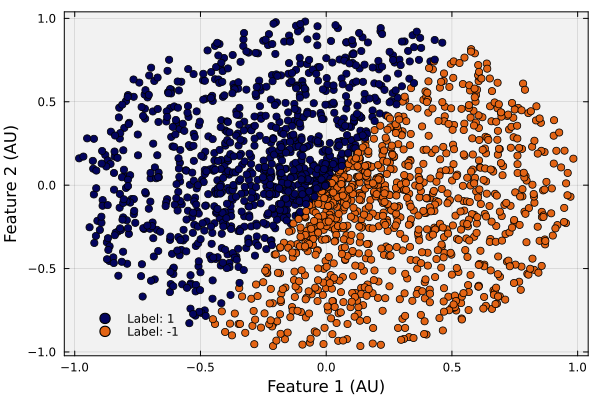

In [6]:
let

    dataset = D; # what dataset am I looking at?
    p = plot(bg="gray95", background_color_outside="white", framestyle = :box, fg_legend = :transparent); # make an empty plot

    # plot label = 1
    testlabel = 1;
    i = findfirst(label -> label == testlabel,  dataset[:,3])
    c = my_color_dictionary[testlabel]
    scatter!([dataset[i,1]], [dataset[i,2]], label="Label: $(testlabel)", c=c)

    # plot label = -1
    testlabel = -1;
    i = findfirst(label -> label == testlabel,  dataset[:,3])
    c = my_color_dictionary[testlabel]
    scatter!([dataset[i,1]], [dataset[i,2]], label="Label: $(testlabel)", c=c)

    # plot all points
    for i ∈ 1:total_number_of_points
        label = dataset[i,3]; # label
        c = my_color_dictionary[label]
        scatter!([dataset[i, 1]], [dataset[i, 2]], label="", mec=:navy, c=c)
    end
    
    xlabel!("Feature 1 (AU)", fontsize=18);
    ylabel!("Feature 2 (AU)", fontsize=18);
end

Next, let's split that dataset `D` into `training` and `test` subsets. We do this randomly, where the `number_of_training_examples::Int64` variable specifies the number of training points. The `training::Array{Float64,2}` data will be used to estimate the model parameters, and `test::Array{Float64,2}` will be used for model testing.

In [7]:
training, test = let

    number_of_training_examples = 1200; # we make this number of
    number_of_examples = total_number_of_points;
    full_index_set = range(1,stop=number_of_examples,step=1) |> collect |> Set;
    
    # build index sets for training and testing
    training_index_set = Set{Int64}();
    should_stop_loop = false;
    while (should_stop_loop == false)
        i = rand(1:number_of_examples);
        push!(training_index_set,i);

        if (length(training_index_set) == number_of_training_examples)
            should_stop_loop = true;
        end
    end
    test_index_set = setdiff(full_index_set,training_index_set);

    # build the test and train datasets -
    training = D[training_index_set |> collect,:];
    test = D[test_index_set |> collect,:];

    # return
    training, test
end;

__Visualize__ the `training` of the `test` datasets. These should look like the original dataset `D`, just with fewer elements, i.e., we should _not_ see an overrepresentation of a particular label because we selected the datasets at random.

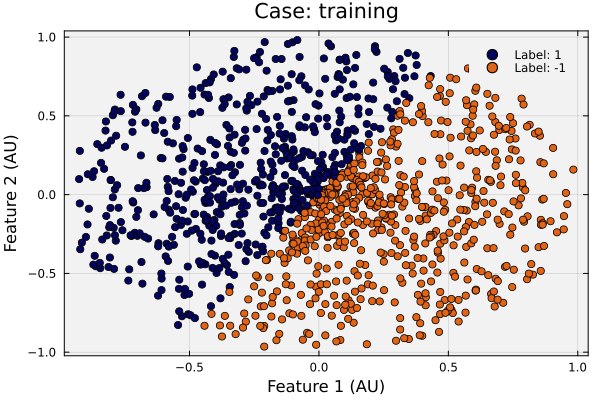

In [8]:
let

    dataset = training; # what dataset am I looking at?
    number_of_points = size(dataset,1); # number of rows
    p = plot(bg="gray95", background_color_outside="white", framestyle = :box, fg_legend = :transparent); # make an empty plot

    caselabel = "training";
    if (dataset == test)
        caselabel="test";
    end
    
    # plot label = 1
    testlabel = 1;
    i = findfirst(label -> label == testlabel,  dataset[:,3])
    c = my_color_dictionary[testlabel]
    scatter!([dataset[i,1]], [dataset[i,2]], label="Label: $(testlabel)", c=c)

    # plot label = -1
    testlabel = -1;
    i = findfirst(label -> label == testlabel,  dataset[:,3])
    c = my_color_dictionary[testlabel]
    scatter!([dataset[i,1]], [dataset[i,2]], label="Label: $(testlabel)", c=c)

    
    for i ∈ 1:number_of_points
        label = dataset[i,3]; # label
        c = my_color_dictionary[label]
        scatter!([dataset[i, 1]], [dataset[i, 2]], label="", mec=:navy, c=c)
    end

    title!("Case: $(caselabel)", fontsize=18)
    xlabel!("Feature 1 (AU)", fontsize=18);
    ylabel!("Feature 2 (AU)", fontsize=18);
end

## Task 2: Build a Perceptron Classification Model and Learn the Parameters
In this task, we'll build a model of our classification problem and train the model using an online learning method. 
* __Training__: Our Perceptron implementation [based on pseudo-code](https://github.com/varnerlab/CHEME-5820-Lectures-Spring-2025/blob/main/lectures/week-3/L3a/docs/Notes.pdf) stores problem information in [a `MyPerceptronClassificationModel` instance, which holds the (initial) parameters and other data](src/Types.jl) required by the problem. We initialize the parameters using a vector of `1`'s.
* Next, we then _learn_ the model parameters [using the `learn(...)` method](src/Compute.jl), which takes the training features array `X,` the training labels vector `y`, and the problem instance and returns an updated problem instance holding the updated parameters. 

In [19]:
perceptron_model = let
    
    # setup
    D = training; # what dataset are we going to use?
    number_of_examples = size(D,1); # how many examples do we have (rows)
    number_of_features = size(D,2); # how many features do we have (cols)?
    X = [D[:,1:end-1] ones(number_of_examples)]; # features, what??
    y = D[:,end]; # output: this is the target data (label)
    
    # build an initial model
    model = build(MyPerceptronClassificationModel, (
        parameters = ones(number_of_features),
        mistakes = 0 # willing to live with m mistakes
    ));

    # TODO: uncomment me to train the model -
    trainedmodel = learn(X,y,model, maxiter = 1000, verbose = true);

    # return -
    trainedmodel;
end;

Stopped after number of iterations: 17. We have number of errors: 0


__Inference__: Now that we have parameters estimated from the `training` data, we can use those parameters on the `test` dataset to see how well the model can differentiate between classes on data it has never seen. 
* We run the classification operation on the (unseen) test data [using the `classify(...)` method](src/Compute.jl). This method takes a feature array `X` and the (trained) model instance. It returns the estimated labels. We store the actual (correct) label in the `y_perceptron::Array{Int64,1}` vector, while the model predicted label is stored in the `ŷ_perceptron::Array{Int64,1}` array.

In [21]:
ŷ_perceptron,y_perceptron = let

    D = test; # what dataset are going to use?
    number_of_examples = size(D,1); # how many examples do we have (rows)
    number_of_features = size(D,2); # how many features do we have (cols)?
    X = [D[:,1:end-1] ones(number_of_examples)]; # features: need to add a 1 to each row (for bias), after removing the label
    y = D[:,end]; # output: this is the *actual* target data (label)

    # TODO: uncomment to compute the estimated labels -
    ŷ = classify(X,perceptron_model)

    # return -
    ŷ,y
end;

__Confusion matrix__: The confusion matrix is a $2\times{2}$ matrix that contains four entries: true positive (TP), false positive (FP), true negative (TN), and false negative (FN). [Click me for a confusion matrix schematic!](https://github.com/varnerlab/CHEME-5820-Labs-Spring-2025/blob/main/labs/week-3/L3b/figs/Fig-BinaryConfusionMatrix.pdf). 

Let's compute the confusion matrix [using the `confusion(...)` method](src/Compute.jl) and store it in the `CM_perceptron::Array{Int64,2}` variable:

In [22]:
CM_perceptron = confusion(y_perceptron, ŷ_perceptron)

2×2 Matrix{Int64}:
 407    0
   0  393

Finally, we can compute the overall error rate for the perceptron (or other performance metrics) using values from [the confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix). The [`confusion(...)` method](src/Compute.jl) takes the actual labels and the computed labels and returns the confusion matrix.

In [23]:
number_of_test_points = length(y_perceptron);
correct_prediction_perceptron = CM_perceptron[1,1] + CM_perceptron[2,2];
(correct_prediction_perceptron/number_of_test_points) |> f-> println("Fraction correct: $(f) Fraction incorrect $(1-f)")

Fraction correct: 1.0 Fraction incorrect 0.0


__Visualize the misses__. Using the test dataset, let's show (with gray circles) which samples our classifier is unable to predict the label correctly, i.e., where we miss the label.

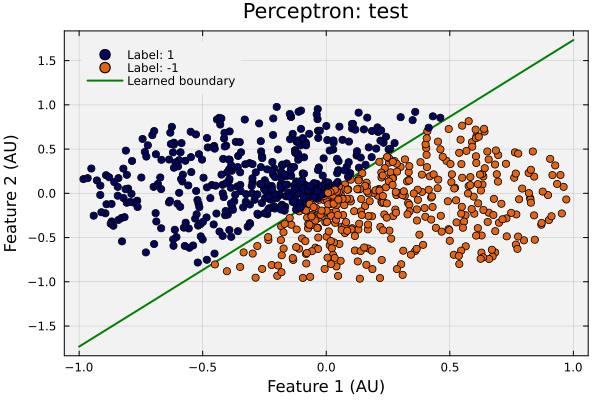

In [24]:
let

    model = perceptron_model; # which model am I using?
    dataset = test; # what dataset am I looking at?
    caselabel = "test";
    actual = y_perceptron;
    predicted = ŷ_perceptron;
    number_of_points = size(dataset,1); # number of rows
    p = plot(bg="gray95", background_color_outside="white", framestyle = :box, fg_legend = :transparent); # make an empty plot
    
    # plot label = 1
    testlabel = 1;
    i = findfirst(label -> label == testlabel,  dataset[:,3])
    c = my_color_dictionary[testlabel]
    scatter!([dataset[i,1]], [dataset[i,2]], label="Label: $(testlabel)", c=c)

    # plot label = -1
    testlabel = -1;
    i = findfirst(label -> label == testlabel,  dataset[:,3])
    c = my_color_dictionary[testlabel]
    scatter!([dataset[i,1]], [dataset[i,2]], label="Label: $(testlabel)", c=c)

    # let's draw the separating hyperplane (in our case, a line)
    p = model.β;
    number_of_plane_points = 200;
    x₂ = zeros(number_of_plane_points);
    x₁ = range(-1,stop=1,length = number_of_plane_points) |> collect;
    for i ∈ 1:number_of_plane_points
        x₂[i] = -1*((p[1]/p[2])*x₁[i] + p[3]/p[2]);
    end
    plot!(x₁,x₂,lw=2, c=:green, label="Learned boundary")
    
    # data -
    for i ∈ 1:number_of_points
        actuallabel = actual[i]; # actual label
        testlabel = predicted[i]; # predited label

        c = :gray60;
        if (actuallabel == testlabel)
            c = my_color_dictionary[actuallabel]
        end
        scatter!([dataset[i, 1]], [dataset[i, 2]], label="", mec=:navy, c=c)
    end

    title!("Perceptron: $(caselabel)", fontsize=18)
    xlabel!("Feature 1 (AU)", fontsize=18);
    ylabel!("Feature 2 (AU)", fontsize=18);
end

## Task 3: Build and Train Logistic Regression Classification Model
In this task, we build and train a [Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression) classifier using the training data, and then challenge this classifier using the `test` dataset.

__Key differences__: Unlike the Perceptron model, which outputs the class label directly, logistic regression models compute the _probability_ that a given input belongs to a particular class based on the input features. The training method is also different, we have to iteratively estimate the model parameters (in this case using [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent)).

We implemented [the `MyLogisticRegressionClassificationModel` type](src/Types.jl), which contains data required to solve the logistic regression problem, i.e., parameters, the learning rate, a stopping tolerance parameter $\epsilon$, and a loss (objective) function that we want to minimize. 
* __Technical note__: We approximated the gradient calculation using [a forward finite difference](https://en.wikipedia.org/wiki/Finite_difference). This is generally not a great idea. This is one of my super pet peeves with gradient descent; computing the gradient is (usually) a hassle. Typically, we have to do at least two function evaluations to approximate the gradient well. Why do finite diference? It is easy to implement.
* In the code below, we [build a `model::MyLogisticRegressionClassificationModel` instance using a `build(...)` method](src/Factory.jl). The model instance initially has a random guess for the classifier parameters. We use gradient descent to refine that guess [using the `learn(...)` method](src/Compute.jl), which returns an updated model instance (with the best parameters that we found so far). We return the updated model instance and save it in the `model_logistic::MyLogisticRegressionClassificationModel` variable.

In [25]:
model_logistic = let

    # data -
    D = training; # What dataset are we going to use?
    number_of_examples = size(D,1); # how many examples do we have (rows)
    number_of_features = size(D,2); # how many features do we have (cols)?
    X = [D[:,1:end-1] ones(number_of_examples)]; # features: need to add a 1 to each row (for bias), after removing the label
    y = D[:,end]; # output: this is the target data (label)

    # model
    model = build(MyLogisticRegressionClassificationModel, (
        parameters = 0.01*ones(number_of_features), # initial value for the parameters: these will be updated
        learning_rate = 0.01, # you pick this
        ϵ = 1e-4, # you pick this (this is also the step size for the fd approx to the gradient)
        loss_function = (x,y,θ) -> log10(1+exp(-y*(dot(x,θ)))) # what??!? Wow, that is nice. Yes, we can pass functions as args!
    ));

    # TDOD: uncomment below to train the Logistic model
    model = learn(X,y,model, maxiter = 10000, verbose = true); # this is learning the model parameters

    # return -
    model;
end;

Stopped after number of iterations: 10001. We have error: 0.2343296248417483


Let's use the updated `model_logistic::MyLogisticRegressionClassificationModel` instance (with parameters learned from the `training` data) and test how well we can classify data in the `test` dataset.

* __Inference__: We run the classification operation on the (unseen) test data [using the `classify(...)` method](src/Compute.jl). This method takes a feature array `X` and the (trained) model instance. It returns the probability of a label in the `P::Array{Float64,2}` array (which is different than the Perceptron). Each row of `P` corresponds to a test instance, in which each column corresponds to a label, in the case `1` and `-1`.
* We store the actual (correct) label in the `y_logistic::Array{Int64,1}` vector. We compute the predicted label for each test instance by finding the highest probability column. We store the predicted labels in the `ŷ_logistic::Array{Int64,1}` vector.

In [28]:
ŷ_logistic,y_logistic, P = let

    D = test; # What dataset are you going to use?
    number_of_examples = size(D,1); # how many examples do we have (rows)
    number_of_features = size(D,2); # how many features do we have (cols)?
    X = [D[:,1:end-1] ones(number_of_examples)]; # features: need to add a 1 to each row (for bias), after removing the label
    y = D[:,end]; # output: this is the *actual* target data (label)

    # TODO: Uncomment below to compute the estimated labels -
    P = classify(X,model_logistic) # logistic regression returns a x x 2 array holding the probability

    # convert the probability to a choice ... for each row (test instance), compute the col with the highest probability
    ŷ = zeros(number_of_examples);
    for i ∈ 1:number_of_examples
        a = argmax(P[i,:]); # col index with largest value
        ŷ[i] = 1; # default
        if (a == 2)
            ŷ[i] = -1;
        end
    end
    
    # return -
    ŷ, y, P
end;

__Performance__: Once we have has converged (or exhasted our iterations), we can evaluate the binary classifier's performance using various metrics. The central idea is to compare the predicted labels $\hat{y}_{i}$ to the actual labels $y_{i}$ in the `test` dataset and measure wins (when the label is the same) and losses (label is different). This is easily represented in [the confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix).
* We compute confusion matrix [using the `confusion(...)` method](src/Compute.jl) and store it in the `CM_logistic::Array{Int64,2}` variable. The [`confusion(...)` method](src/Compute.jl) takes the actual labels and the computed labels and returns the confusion matrix.

In [29]:
CM_logistic = confusion(y_logistic, ŷ_logistic)

2×2 Matrix{Int64}:
 401    6
   0  393

Let's compute the overall error rate for the logistic regression using [the confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix)

In [30]:
number_of_test_points = length(y_perceptron);
correct_prediction_logistic = CM_logistic[1,1] + CM_logistic[2,2];
(correct_prediction_logistic/number_of_test_points) |> f-> println("Fraction correct: $(f) Fraction incorrect $(1-f)")

Fraction correct: 0.9925 Fraction incorrect 0.007499999999999951


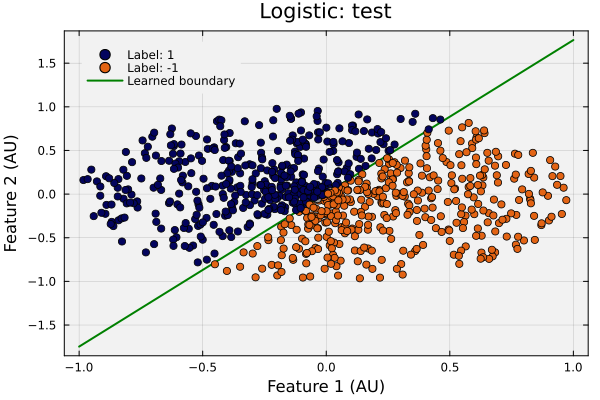

In [31]:
let

    model = model_logistic; # which model am I using?
    dataset = test; # what dataset am I looking at?
    caselabel = "test";
    actual = y_logistic;
    predicted = ŷ_logistic;
    number_of_points = size(dataset,1); # number of rows
    p = plot(bg="gray95", background_color_outside="white", framestyle = :box, fg_legend = :transparent); # make an empty plot
    
    # plot label = 1
    testlabel = 1;
    i = findfirst(label -> label == testlabel,  dataset[:,3])
    c = my_color_dictionary[testlabel]
    scatter!([dataset[i,1]], [dataset[i,2]], label="Label: $(testlabel)", c=c)

    # plot label = -1
    testlabel = -1;
    i = findfirst(label -> label == testlabel,  dataset[:,3])
    c = my_color_dictionary[testlabel]
    scatter!([dataset[i,1]], [dataset[i,2]], label="Label: $(testlabel)", c=c)

    # let's draw the separating hyperplane (in our case, a line)
    p = model.β;
    number_of_plane_points = 200;
    x₂ = zeros(number_of_plane_points);
    x₁ = range(-1,stop=1,length = number_of_plane_points) |> collect;
    for i ∈ 1:number_of_plane_points
        x₂[i] = -1*((p[1]/p[2])*x₁[i] + p[3]/p[2]);
    end
    plot!(x₁,x₂,lw=2, c=:green, label="Learned boundary")
    
    # data -
    for i ∈ 1:number_of_points
        actuallabel = actual[i]; # actual label
        testlabel = predicted[i]; # predited label

        c = :gray60;
        if (actuallabel == testlabel)
            c = my_color_dictionary[actuallabel]
        end
        scatter!([dataset[i, 1]], [dataset[i, 2]], label="", mec=:navy, c=c)
    end

    title!("Logistic: $(caselabel)", fontsize=18)
    xlabel!("Feature 1 (AU)", fontsize=18);
    ylabel!("Feature 2 (AU)", fontsize=18);
end